In [2]:
import spacy
import json
import codecs

from climdist.ner import evaluation as nereval
from climdist.ner import doccano_transformations as dt

## Importer les données de référence

In [27]:
with codecs.open('../pipeline/03_ner/01_doccano/ner_eval_annotated_120621.jsonl', 'r', encoding='utf8') as f:
    contents = f.readlines()
    gold_data_doccano = []
    for line in contents:
        gold_data_doccano.append(json.loads(line))

In [35]:
ents_dico = dt.create_ents_dico(gold_data_doccano)
gold_data = dt.doccano_to_spacy('../pipeline/03_ner/01_doccano/ner_eval_annotated_120621.jsonl', ents_dico)

Wichallin Booth
Carnot
label: PER


10. October (28. September
10. October (28. September
10. October
28. September
10. October (28. September
label: DAT


Paris
Oran
Nemours
Nemours
Brüsfel
Niarseillq
Kieh
label: LOC


Russischen Dampffregatte „Wladimir"
Dampf
fregatte „Wladimir"
label: MISC


Sturme
label: WEA


„Journal des Debats"
label: ORG


{33: 'PER', 30: 'DAT', 31: 'LOC', 32: 'MISC', 34: 'WEA', 36: 'ORG'}


## 1e évaluation

In [29]:
nlp_ech = spacy.load('../data/models/ECH_storms_ner_model/')

In [36]:
predictions1 = [nlp_ech(entry['text']) for entry in gold_data]

[[9206  111]
 [ 168  183]]
['LOC']
precision: 0.6224489795918368, recall: 0.5213675213675214, f-score: 0.5674418604651164


[[9160   43]
 [  33   60]]
['WEA']
precision: 0.5825242718446602, recall: 0.6451612903225806, f-score: 0.6122448979591837


[[9429   21]
 [  85  188]]
['DAT']
precision: 0.8995215311004785, recall: 0.6886446886446886, f-score: 0.7800829875518672


[[8913   54]
 [ 236  121]]
['PER']
precision: 0.6914285714285714, recall: 0.3389355742296919, f-score: 0.45488721804511284


[[36708   229]
 [  522   552]]
['LOC', 'WEA', 'DAT', 'PER']
precision: 0.706786171574904, recall: 0.5139664804469274, f-score: 0.5951482479784367




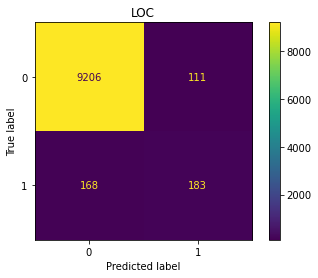

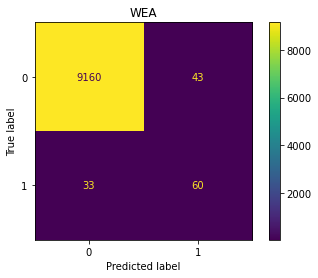

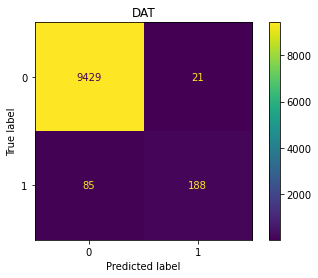

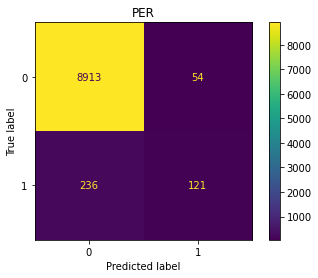

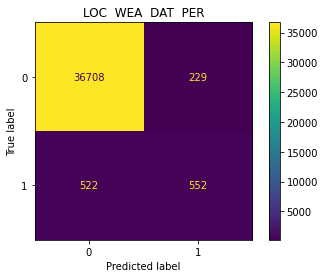

In [43]:
output_dir = '../references/memoire_M1/figures/1_annotation_conf_matr/'

for label in ['LOC', 'WEA', 'DAT', 'PER']:
    nereval.evaluation_results(predictions1, gold_data, [label], output_dir=output_dir)
    
nereval.evaluation_results(predictions1, gold_data, ['LOC', 'WEA', 'DAT', 'PER'], output_dir=output_dir)

## 2e évaluation

In [38]:
nlp = spacy.load('../data/models/spacy_model_250421/')

In [39]:
predictions2 = [nlp(entry['text']) for entry in gold_data]

[[9282   35]
 [  76  275]]
['LOC']
precision: 0.8870967741935484, recall: 0.7834757834757835, f-score: 0.8320726172465962


[[9189   14]
 [  25   68]]
['WEA']
precision: 0.8292682926829268, recall: 0.7311827956989247, f-score: 0.7771428571428571


[[9432   18]
 [  37  236]]
['DAT']
precision: 0.9291338582677166, recall: 0.8644688644688645, f-score: 0.8956356736242884


[[8878   89]
 [ 115  242]]
['PER']
precision: 0.7311178247734139, recall: 0.6778711484593838, f-score: 0.7034883720930233


[[36781   156]
 [  253   821]]
['LOC', 'WEA', 'DAT', 'PER']
precision: 0.8403275332650972, recall: 0.7644320297951583, f-score: 0.8005850804485617




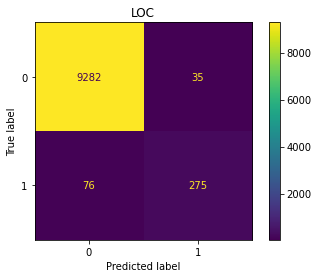

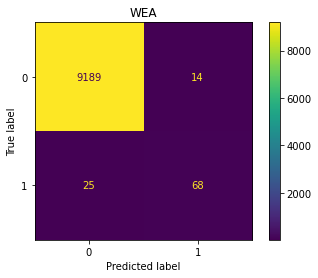

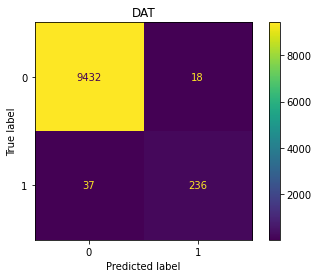

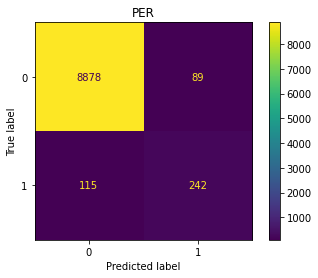

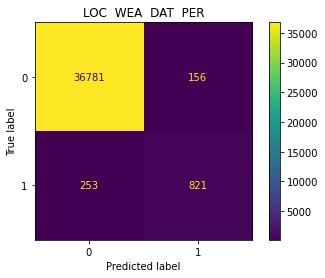

In [44]:
output_dir2 = '../references/memoire_M1/figures/2_annotation_conf_matr/'

for label in ['LOC', 'WEA', 'DAT', 'PER']:
    nereval.evaluation_results(predictions2, gold_data, [label], output_dir=output_dir2)
    
nereval.evaluation_results(predictions2, gold_data, ['LOC', 'WEA', 'DAT', 'PER'], output_dir=output_dir2)